# Optimieren der Datenanalyse für ein Bsp

- try out different 2d fit alg 
- try out gute punkte für den fit auswählen
- think about abstand Bildrand beim cutten, oder wie Bildrand bestimmt wird 

In [19]:
#Imports
from matplotlib import pyplot as plt
import numpy as np

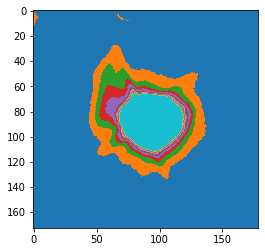

In [20]:
#import data
with open('roi.npy', 'rb') as f:
    roi = np.load(f)
plt.imshow(roi, cmap='tab10')
plt.show()

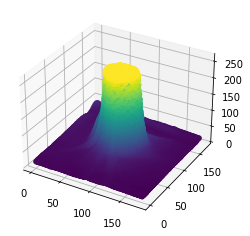

In [21]:
z_werte = roi.flatten()
roi_x = roi.shape[1]
roi_y = roi.shape[0]
x_werte = np.repeat(np.array([range(0,roi_x)]), roi_y, axis=0).flatten()
y_werte = np.repeat(np.array([range(roi_y-1, -1, -1)]).reshape(roi_y,1), roi_x, axis=1).flatten()

ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte, c=z_werte, cmap='viridis', linewidth=0.5)

## 2D fit 

1. Variante genau für gauss
https://lmfit.github.io/lmfit-py/examples/example_two_dimensional_peak.html
https://lmfit.github.io/lmfit-py/builtin_models.html

In [22]:
import lmfit
from lmfit.lineshapes import gaussian2d, lorentzian

In [23]:
model = lmfit.models.Gaussian2dModel()
params = model.guess(z_werte, x_werte, y_werte)
error = np.sqrt(z_werte+1)
result = model.fit(z_werte, x=x_werte, y=y_werte, params=params)
lmfit.report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 30967
    # variables        = 5
    chi-square         = 15465292.0
    reduced chi-square = 499.492668
    Akaike info crit   = 192421.332
    Bayesian info crit = 192463.035
[[Variables]]
    amplitude:  953607.251 +/- 2506.47815 (0.26%) (init = 216863.3)
    centerx:    92.3954026 +/- 0.06312309 (0.07%) (init = 80)
    centery:    85.3539544 +/- 0.05477223 (0.06%) (init = 105)
    sigmax:     24.0157885 +/- 0.06312546 (0.26%) (init = 29.66667)
    sigmay:     20.8387751 +/- 0.05477231 (0.26%) (init = 28.66667)
    fwhmx:      56.5528590 +/- 0.14864910 (0.26%) == '2.3548200*sigmax'
    fwhmy:      49.0715644 +/- 0.12897893 (0.26%) == '2.3548200*sigmay'
    height:     2993.09414 +/- 7.86707790 (0.26%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigmax) =  0.500
    C(amplitude, sigmay) = 

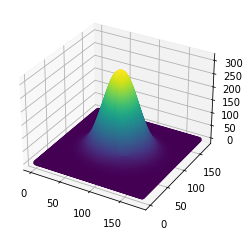

In [24]:
z_fitted = model.func(x_werte, y_werte, **result.best_values)
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_fitted, c=z_fitted, cmap='viridis', linewidth=0.5)

Variante von Alex 

In [ ]:
scipy.optimize.minimize(......)

## Daten auswählen 

In [25]:
Idee für jeden dritten wert
subArray = []
newRow = []
for row in data:
    for i in xrange(0,len(row)):
        if (i % 3 == 0):
            continue
        newRow.append(row[i])
    subArray.append(newRow)
    newRow = []


#Idee: vlt verschiedene Schichten mit labeln finden und dann aus den Bereichen was auswählen 

SyntaxError: invalid syntax (Temp/ipykernel_18788/4217662582.py, line 1)

## Bildrand bestimmen 

Idee: mit labeln und deren Attributen spielen 